In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.style.use('dark_background') 
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
from collections import Counter

In [2]:
data = pd.read_csv('FINAL_ARXIV_2025_copy.csv')

In [3]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,NaN,"['Galaxies (573)', 'Astronomy image processing...",2025-01-01
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,NaN,['powered by accretion of matter from a compan...,2025-01-01
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,NaN,[],2025-01-01
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,NaN,"['Cosmic Rays 1', 'HII regions', 'Gamma rays',...",2025-01-01
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,NaN,['galaxies: rotation curve - galaxies: fundame...,2025-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18329,Systematic search of laser and phase modulatio...,Heterodyne interferometry for precision scienc...,"['Kohei Yamamoto', 'Olaf Hartwig', 'Lennart Wi...",8.0,24.0,0.0,arxiv.org/pdf/2512.17802,Instrumentation and Methods for Astrophysics,"['Applied Physics', 'Optics']",NaN,NaN,[],2025-12-22
18330,Investigating the AGN variability timescale --...,Active galactic nuclei (AGNs) exhibit variabil...,"['Adrien Hélias', 'Sarah C. Gallagher', 'Pauli...",13.0,16.0,1.0,arxiv.org/pdf/2512.17811,Astrophysics of Galaxies,NaN,NaN,NaN,['Active galactic nuclei (16) - Light curves (...,2025-12-22
18331,Constraining primordial non-Gaussianity from D...,We present the first measurement of local-type...,"['Sofia Chiarenza', 'Alex Krolewski', 'Marco B...",17.0,42.0,11.0,arxiv.org/pdf/2512.17865,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,['cosmological parameters from LSS – power spe...,2025-12-22
18332,On the complex nature of coronal heating,A large part of the hot corona consists of mag...,"['C.A. Breu', 'D.I. Pontin', 'E. Priest', 'I. ...",18.0,18.0,2.0,arxiv.org/pdf/2512.17880,Solar and Stellar Astrophysics,NaN,NaN,NaN,['Sun:corona – Sun:magnetic fields 1 INTRODUCT...,2025-12-22


In [4]:
data['date'] = pd.to_datetime(data['date'])
monthly_counts = (
    data['date']
    .dt.to_period('M')
    .value_counts()
    .sort_index()
)
print(monthly_counts)

date
2025-01    1344
2025-02    1287
2025-03    1585
2025-04    1467
2025-05    1386
2025-06    1478
2025-07    1816
2025-08    1304
2025-09    1860
2025-10    1889
2025-11    1551
2025-12    1367
Freq: M, Name: count, dtype: int64


In [5]:
mask = data['date'] == '2025-12-15'
masked_data = data[mask]
print(masked_data)

Empty DataFrame
Columns: [title, abstract, authors, figures, pages, tables, pdf_link, primary_subject, secondary_subjects, submitted_journal, published_journal, keywords, date]
Index: []


In [6]:
authors = data['authors'].tolist()
# Flatten the list of authors and count occurrences
all_authors = [author for sublist in authors for author in sublist.split(', ')]
author_counts = Counter(all_authors)

# Find the most common author
most_common_author, count = author_counts.most_common(1)[0]
print(f"The most repeated author is {most_common_author} and they were repeated {count} times.")

# Find the second most common author
second_most_common_author, count = author_counts.most_common(2)[1]
print(f"The second most repeated author is {second_most_common_author} and they were repeated {count} times.")

The most repeated author is 'J. Carretero' and they were repeated 138 times.
The second most repeated author is 'C. Baccigalupi' and they were repeated 112 times.


In [7]:
primary_subjects = data['primary_subject'].tolist()
# Flatten the list of primary subjects and count occurrences
all_primary_subjects = [subject for sublist in primary_subjects for subject in sublist.split(', ')]
primary_subject_counts = Counter(all_primary_subjects)

# Find the most common primary subject
most_common_primary_subject, count = primary_subject_counts.most_common(1)[0]
print(f"The most repeated primary subject is {most_common_primary_subject} and it was repeated {count} times.")

# Find the 2nd most common primary subject
most_common_primary_subject_2, count = primary_subject_counts.most_common(2)[1]
print(f"The second most repeated primary subject is {most_common_primary_subject_2} and it was repeated {count} times.")

The most repeated primary subject is Astrophysics of Galaxies and it was repeated 4698 times.
The second most repeated primary subject is High Energy Astrophysical Phenomena and it was repeated 3785 times.


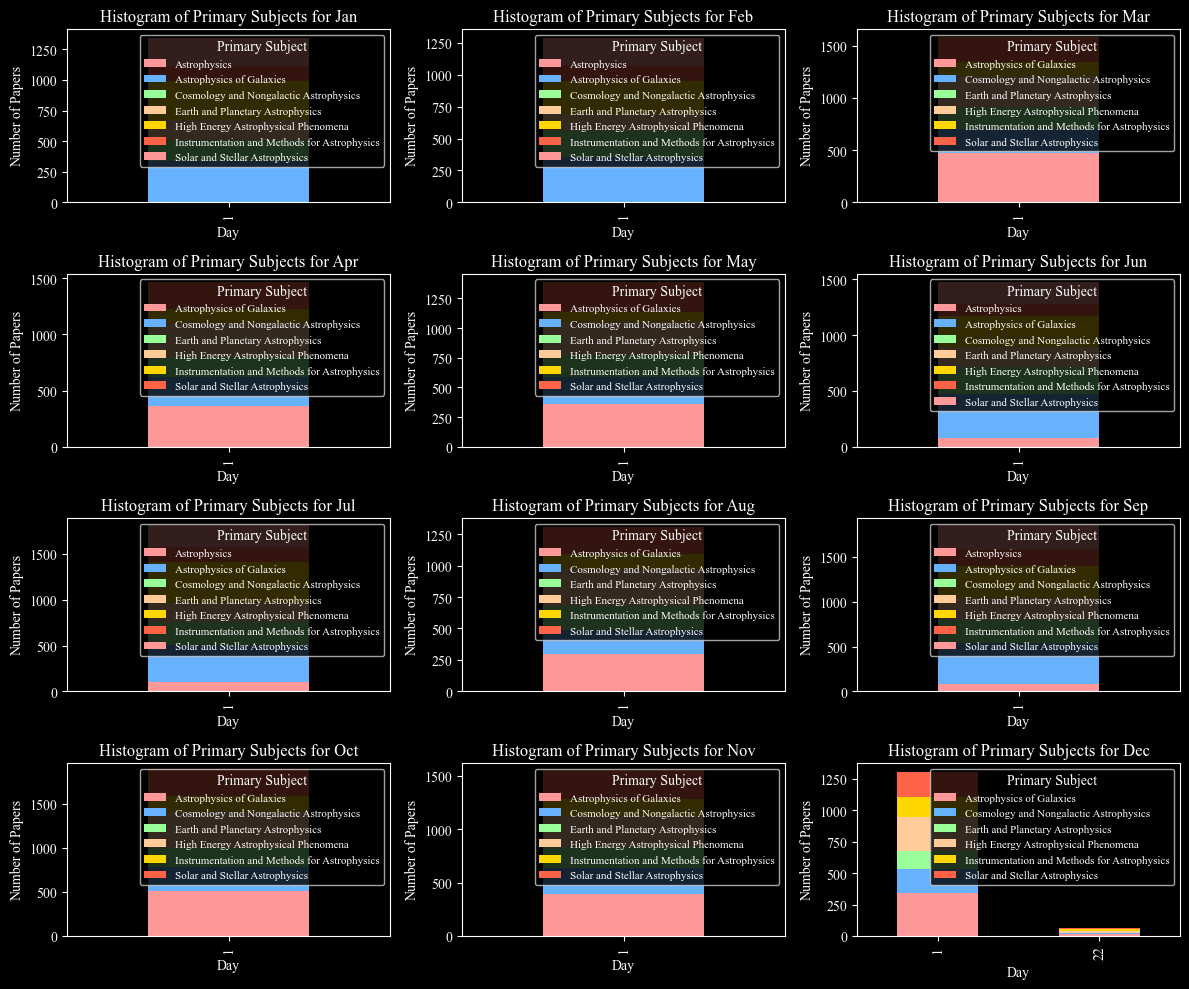

In [8]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.strftime('%b')

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347']

num_unique_months = data['month'].nunique()
list_unique_months = data['month'].unique()

fig, axs = plt.subplots(4, 3, figsize=(12, 10))

for i in range(num_unique_months):
    ax = axs[i // 3, i % 3]
    masked_data = data[data['month'] == list_unique_months[i]]
    subject_counts_per_day = masked_data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)
    subject_counts_per_day.plot(kind='bar', stacked=True, ax=ax, color=colors)
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Papers')
    ax.set_ylim(0, max(subject_counts_per_day.sum(axis=1)) + 70)
    ax.set_title(f'Histogram of Primary Subjects for {list_unique_months[i]}')
    ax.legend(title='Primary Subject', fontsize = 8, loc = 'upper right')

plt.tight_layout()
plt.show()


IndexError: list index out of range

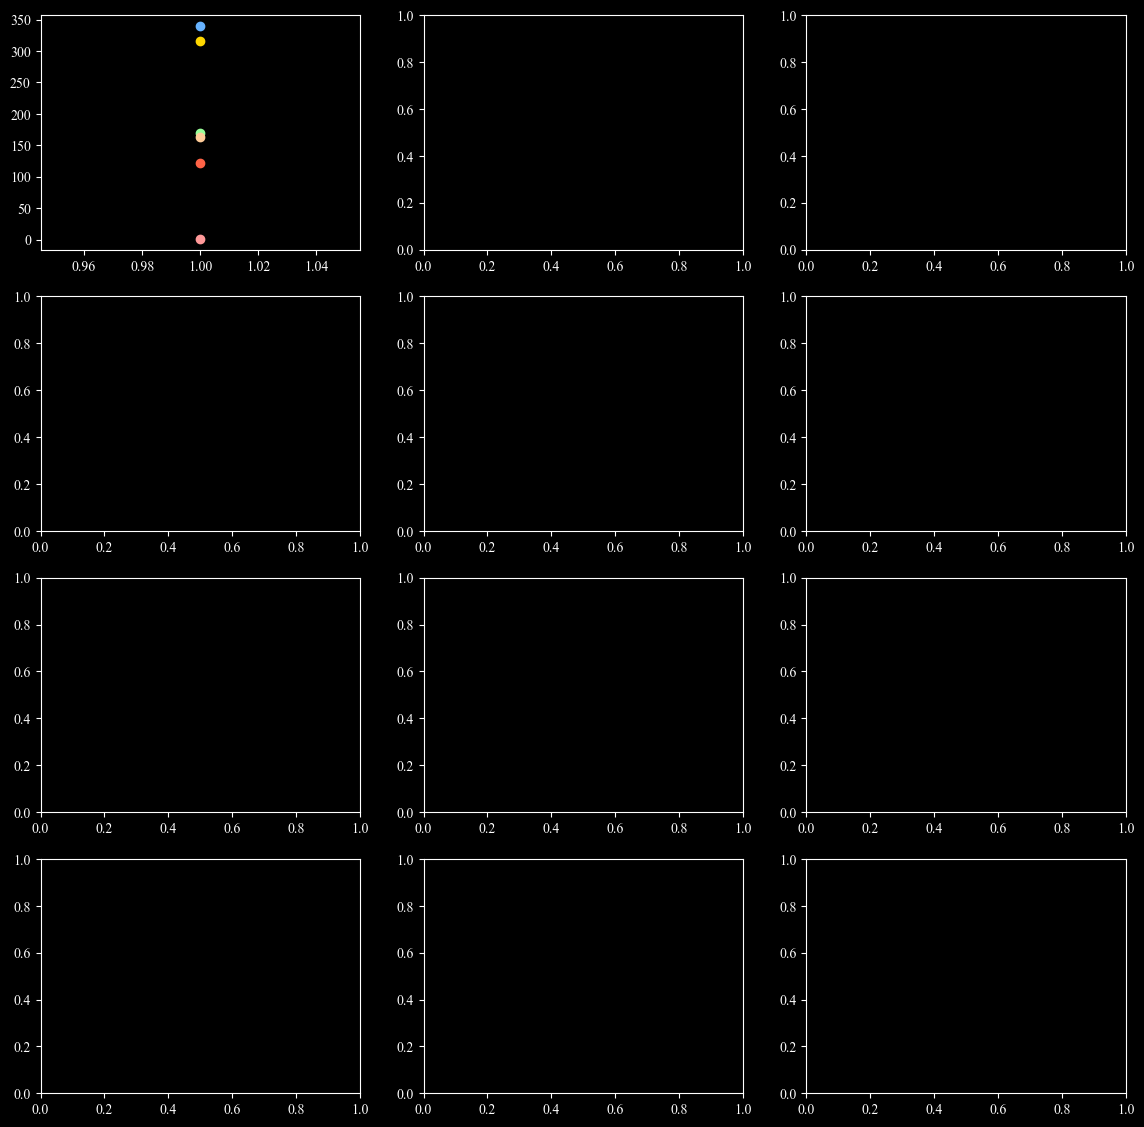

In [9]:
fig, axs = plt.subplots(4, 3, figsize=(14, 14))

for i, month in enumerate(list_unique_months):
    ax = axs[i // 3, i % 3]
    masked_data = data[data['month'] == month]
    subject_counts_per_day = masked_data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)
    for j, subject in enumerate(subject_counts_per_day.columns):
        ax.plot(subject_counts_per_day.index, subject_counts_per_day[subject], color=colors[j], label=subject, marker='o')
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Papers')
    ax.set_title(f'Line Plot of Primary Subjects for {month}')
    xticks_labels = [f"{day}" for day in subject_counts_per_day.index]
    ax.set_xticks(subject_counts_per_day.index)
    ax.set_xticklabels(xticks_labels, rotation=0)
    ax.legend(title='Primary Subject', fontsize=8, loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:

i = 6 # Month Number
masked_data = data[data['month'] == list_unique_months[i]]

figures_per_day = masked_data.groupby('day')['figures'].sum()
tables_per_day = masked_data.groupby('day')['tables'].sum()
pages_per_day = masked_data.groupby('day')['pages'].sum()
authors_per_day = masked_data.groupby('day')['authors'].apply(lambda x: x.str.split(', ').str.len().sum())

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_day.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Number of Figures')
ax[0, 0].set_title('Number of Figures per Day')
ax[0, 0].set_xticks(range(len(figures_per_day)))
ax[0, 0].set_xticklabels(figures_per_day.index, rotation=0)

tables_per_day.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Number of Tables')
ax[0, 1].set_title('Number of Tables per Day')
ax[0, 1].set_xticks(range(len(tables_per_day)))
ax[0, 1].set_xticklabels(tables_per_day.index, rotation=0)

pages_per_day.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Number of Pages')
ax[1, 0].set_title('Number of Pages per Day')
ax[1, 0].set_xticks(range(len(pages_per_day)))
ax[1, 0].set_xticklabels(pages_per_day.index, rotation=0)

authors_per_day.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Number of Authors')
ax[1, 1].set_title('Number of Authors per Day')
ax[1, 1].set_xticks(range(len(authors_per_day)))
ax[1, 1].set_xticklabels(authors_per_day.index, rotation=0)

plt.suptitle(f'Figures, Tables, Pages, and Authors per Day for {list_unique_months[i]}', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
masked_data = data[data['month'] == list_unique_months[i]]

papers_per_day = masked_data.groupby('day').size()

figures_per_paper = figures_per_day / papers_per_day
tables_per_paper = tables_per_day / papers_per_day
pages_per_paper = pages_per_day / papers_per_day
authors_per_paper = authors_per_day / papers_per_day

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_paper.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Figures per Paper')
ax[0, 0].set_title('Number of Figures per Paper per Day')
ax[0, 0].set_xticks(range(len(figures_per_paper)))
ax[0, 0].set_xticklabels(figures_per_paper.index, rotation=0)

tables_per_paper.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Tables per Paper')
ax[0, 1].set_title('Number of Tables per Paper per Day')
ax[0, 1].set_xticks(range(len(tables_per_paper)))
ax[0, 1].set_xticklabels(tables_per_paper.index, rotation=0)

pages_per_paper.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Pages per Paper')
ax[1, 0].set_title('Number of Pages per Paper per Day')
ax[1, 0].set_xticks(range(len(pages_per_paper)))
ax[1, 0].set_xticklabels(pages_per_paper.index, rotation=0)

authors_per_paper.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Authors per Paper')
ax[1, 1].set_title('Number of Authors per Paper per Day')
ax[1, 1].set_xticks(range(len(authors_per_paper)))
ax[1, 1].set_xticklabels(authors_per_paper.index, rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
masked_data = data[data['month'] == list_unique_months[i]]
submitted_papers_per_day = masked_data.groupby('day')['submitted_journal'].count()
published_papers_per_day = masked_data.groupby('day')['published_journal'].count()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

submitted_papers_per_day.plot(kind='bar', ax=ax[0], color='#66B2FF')
ax[0].set_xlabel('Day')
ax[0].set_ylabel('Number of Submitted Papers')
ax[0].set_title('Number of Submitted Papers per Day')
ax[0].set_xticks(range(len(submitted_papers_per_day)))
ax[0].set_xticklabels(submitted_papers_per_day.index, rotation=0)

published_papers_per_day.plot(kind='bar', ax=ax[1], color='#FF9999')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Number of Published Papers')
ax[1].set_title('Number of Published Papers per Day')
ax[1].set_xticks(range(len(published_papers_per_day)))
ax[1].set_xticklabels(published_papers_per_day.index, rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
keywords = data['keywords'].tolist()

# Flatten the list of keywords and count occurrences, handling different formats
all_keywords = []
for keyword_str in keywords:
    try:
        # Try to handle string representations of lists
        if isinstance(keyword_str, str):
            # Remove brackets and quotes
            keyword_str = keyword_str.strip('[]').replace("'", "")
            # Split by comma and clean up
            keywords_list = [k.strip() for k in keyword_str.split(',') if k.strip()]
            all_keywords.extend(keywords_list)
    except:
        continue

keyword_counts = Counter(all_keywords)

# Find the most common keyword
most_common_keyword, count = keyword_counts.most_common(1)[0]
print(f"The most repeated keyword is {most_common_keyword} and it was repeated {count} times.")

# Second most common keyword
second_most_common_keyword, count = keyword_counts.most_common(2)[1]
print(f"The second most repeated keyword is {second_most_common_keyword} and it was repeated {count} times.")


In [ ]:
# Find the author papers
author = 'Jose'
papers = data[data['authors'].str.contains(author)]
papers


In [ ]:
num = []
data['date'] = pd.to_datetime(data['date'])
for i in range(12):
    mask = data['date'].dt.month == i+1
    num.append(len(data[mask]))
    print(len(data[mask]))

1343
1287
1483
1519
1449
1368
1754
1299
1738
1913
1516
1416


In [ ]:
check = [1344, 1287, 1585, 1467, 1386, 1478, 1816, 1304, 1860, 1889, 1551, 1305]

diff = np.array(check) - np.array(num)
diff

array([   1,    0,  102,  -52,  -63,  110,   62,    5,  122,  -24,   35,
       -111])

In [ ]:
net = np.sum(diff)
net

187

In [ ]:
months_missing = pd.read_csv('/Users/ainsleylewis/Documents/Astronomy/arXiver/months_missing_papers.csv', header=0)
months_missing

,title,month,id
0,Distribution of regularized three-body phase-v...,2025-01,2501.02013
1,Bound Domains,2025-02,2502.17180
2,AGNI: A radiative-convective model for lava pl...,2025-06,2506.00091
3,Complete survey of r-process conditions: the (...,2025-06,2506.00092
4,Radiation-magnetohydrodynamic Simulations of A...,2025-06,2506.00109
...,...,...,...
263,Outflow-cloud interaction as the possible orig...,2025-09,2509.21299
264,J-PLUS: Understanding outlier white dwarfs in ...,2025-09,2509.21304
265,Towards the Giant Radio Array for Neutrino Det...,2025-09,2509.21306
266,Einstein@Home Searches for Gamma-ray Pulsars i...,2025-09,2509.21307


In [ ]:
# Overlapping 
arxiv_ids = data['title']

# Cross-match with months_missing DataFrame
overlap = months_missing[months_missing['title'].isin(arxiv_ids)]
overlap

In [ ]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,NaN,"['Galaxies (573)', 'Astronomy image processing...",2025-01-03
1,Hunting for the candidates of Changing-Look Bl...,The changing-look blazars (CLBs) are the blaza...,"['Shi-Ju Kang', 'Shan-Shan Ren', 'Yong-Gang Zh...",7.0,13.0,3.0,arxiv.org/pdf/2501.00094,High Energy Astrophysical Phenomena,NaN,ApJ,NaN,['Active galactic nuclei (16) – Blazars (164) ...,2025-01-03
2,First unambiguous detection of ammonia in the ...,The newly accessible mid-infrared (MIR) window...,"['Mathilde Mâlin', 'Anthony Boccaletti', 'Clém...",6.0,18.0,4.0,arxiv.org/pdf/2501.00104,Earth and Planetary Astrophysics,NaN,A&A,NaN,"['Planetary systems', 'Stars: individual: GJ 5...",2025-01-03
3,Exchange of meteorites between the terrestrial...,The evolution of the orbits of bodies ejected ...,['S.I. Ipatov'],0.0,6.0,0.0,arxiv.org/pdf/2501.00134,Earth and Planetary Astrophysics,NaN,NaN,Modern astronomy: from the Early Universe to e...,['planets and satellites: terrestrial planets'],2025-01-03
4,Autoencoder Reconstruction of Cosmological Mic...,Enhanced modeling of microlensing variations i...,"['Somayeh Khakpash', 'Federica Bianco', 'Georg...",11.0,18.0,1.0,arxiv.org/pdf/2501.00153,Instrumentation and Methods for Astrophysics,NaN,The Astrophysical Journal,NaN,['- Interdisciplinary astronomy(804) 1'],2025-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18080,Connecting current and future dual AGN searche...,Dual active galactic nuclei (DAGN) mark an obs...,"['Nianyi Chen', 'Yihao Zhou', 'Ekaterine Dadia...",16.0,20.0,1.0,arxiv.org/pdf/2512.16844,Astrophysics of Galaxies,NaN,NaN,NaN,['Gravitational waves— Supermassive black hole...,2025-12-19
18081,BeppoSAX-WFC catalog of fast X-ray transients,We performed a search for fast X-ray transient...,"[""J.J.M. in 't Zand"", 'C. Guidorzi', 'J. Heise...",7.0,30.0,4.0,arxiv.org/pdf/2512.16845,High Energy Astrophysical Phenomena,NaN,NaN,NaN,['Catalogs – Gamma-ray bursts – Gamma-rays: st...,2025-12-19
18082,A Radio Search for Star-Planet Interaction in ...,We present the first targeted centimeter-band ...,"['Kevin N. Ortiz Ceballos', 'Yvette Cendes', '...",7.0,9.0,1.0,arxiv.org/pdf/2512.16852,Earth and Planetary Astrophysics,['Solar and Stellar Astrophysics'],NaN,NaN,['Radio astronomy (1338) — Star-planet interac...,2025-12-19
18083,Robust CMB B-mode analysis with Needlet-ILC an...,We explore a novel analysis framework for para...,"['Adriaan J. Duivenvoorden', 'Kristen Surrao',...",16.0,33.0,4.0,arxiv.org/pdf/2512.16869,Cosmology and Nongalactic Astrophysics,['Instrumentation and Methods for Astrophysics'],NaN,NaN,[],2025-12-19


In [ ]:
import pandas as pd
data1 = pd.read_csv("FINAL_ARXIV_2025.csv")
data2 = pd.read_csv("arxiv_papers.csv")


In [ ]:
data1.columns

Index(['title', 'abstract', 'authors', 'figures', 'pages', 'tables',
       'pdf_link', 'primary_subject', 'secondary_subjects',
       'submitted_journal', 'published_journal', 'keywords', 'date'],
      dtype='object')

In [ ]:
data2.columns

Index(['title', 'abstract', 'authors', 'figures', 'pages', 'tables',
       'pdf_link', 'primary_subject', 'secondary_subjects',
       'submitted_journal', 'published_journal', 'keywords', 'date'],
      dtype='object')

In [2]:
import pandas as pd
import ast
df = pd.read_csv("test_filled_13.csv")
 # Generate Report & Identify Done Papers
fully_filled_count = 0
partially_filled_count = 0
total_null_author_slots = 0
incomplete_indices = []
total_papers = len(df)

done_titles = []

for idx, row in df.iterrows():
    try:
        affs = ast.literal_eval(str(row['affiliations']))
        null_count = sum(1 for a in affs if a is None)
        total_null_author_slots += null_count
        if null_count == 0: 
            fully_filled_count += 1
            done_titles.append(row['title'])
        else:
            partially_filled_count += 1
            incomplete_indices.append(idx)
    except: 
        incomplete_indices.append(idx)

with open("missing_affiliations_reports.txt", 'w', encoding='utf-8') as f:
    f.write("=== MISSING AFFILIATIONS REPORT (V11) ===\n\n")
    f.write(f"Total papers: {total_papers}\n")
    f.write(f"Fully filled papers: {fully_filled_count}\n")
    f.write(f"Partially filled papers: {partially_filled_count}\n")
    f.write(f"Total remaining null author affiliations: {total_null_author_slots}\n")
    f.write(f"\nRemaining incomplete indices ({len(incomplete_indices)}):\n")
    f.write(str(incomplete_indices) + "\n")


In [ ]:
author_affil_dict = {}
#Code for generating author affiliation dictionary
for idx, row in df.iterrows():
    try:
       #the author affiliation is in the 'affiliations' column for each author which has multiple entries
       #the separator is ;
        authors = list(ast.literal_eval(row['authors']))
        affiliations = list(ast.literal_eval(row['affiliations']))
        print(row['affiliations'])
        # print(authors)
        for author, affil in zip(authors, affiliations):
            if author not in author_affil_dict:
                author_affil_dict[author] = []
            list(set(author_affil_dict[author].extend(affil.split(';'))))
            if affil is not None:
                author_affil_dict[author] = affil

    except Exception as e:
        print(f"Error processing row {idx}: {e}")

Error processing row 0: 'NoneType' object is not iterable
Error processing row 1: 'NoneType' object is not iterable
Error processing row 2: 'NoneType' object is not iterable
Error processing row 3: 'NoneType' object is not iterable
Error processing row 4: 'NoneType' object is not iterable
Error processing row 5: 'NoneType' object is not iterable
Error processing row 6: 'NoneType' object is not iterable
Error processing row 7: 'NoneType' object is not iterable
Error processing row 8: 'NoneType' object is not iterable
Error processing row 9: 'NoneType' object is not iterable
Error processing row 10: 'NoneType' object is not iterable
Error processing row 11: 'NoneType' object is not iterable
Error processing row 12: 'NoneType' object is not iterable
Error processing row 13: 'NoneType' object is not iterable
Error processing row 14: 'NoneType' object is not iterable
Error processing row 15: 'NoneType' object is not iterable
Error processing row 16: 'NoneType' object is not iterable
Error p

In [4]:
author_affil_dict['B. Rani']

['NASA Goddard Space Flight Center, Greenbelt, MD 20771, USA',
 ' Center for Space Science and Technology, University of Maryland Baltimore County, USA',
 ' Korea Astronomy and Space science Institute, 776 Daedeokdae-ro, Yuseong-gu, Daejeon 30455, Korea']

In [5]:
missing_affil_authors = []
# to create a list of all authors with no affiliations in the dataset
for idx, row in df.iterrows():
    try:
       #the author affiliation is in the 'affiliations' column for each author which has multiple entries
       #the separator is ;
        authors = list(ast.literal_eval(row['authors']))
        affiliations = list(ast.literal_eval(row['affiliations']))
        # print(authors)
        for author, affil in zip(authors, affiliations):
            if affil is None:
                if author not in missing_affil_authors:
                    missing_affil_authors.append(author)

    except Exception as e:
        print(f"Error processing row {idx}: {e}")


In [6]:
missing_affil_authors

['R. Mushotzky',
 'A. Castellanos-Ramirez',
 'J. Canto',
 'Zoltan Haiman',
 'Carlotta Pittori',
 'Marco Tavani',
 'Andrea Argan',
 'Andrea Bulgarelli',
 'Guido Barbiellini',
 'Luca Salotti',
 'Elisabetta Tommasi',
 'Elisabetta Cavazzuti',
 "Fabio D'Amico",
 'Giovanno Valentini',
 'Munzer Jahjah',
 'Barbara Negri',
 'Giovanni Annoni',
 'Ewa L. Lokas',
 'G.A. Galazutdinov',
 'Rico K. L. Lo',
 'Adrian J. E. Knagg-Baugh',
 'Ian Cass',
 'Cécile Melis',
 'Cyril Richard',
 'Helena Treiber',
 'Georgios Vasilopoulos',
 'Charles Bailyn',
 'Joseph Callow',
 'Or Graur',
 'Peter Clark',
 'Alex G. Kim',
 "Brendan O'Connor",
 'Jessica Aguilar',
 'Steven Ahlen',
 'Davide Bianchi',
 'David Brooks',
 'Axel de la Macorra',
 'Arjun Dey',
 'Peter Doel',
 'Jaime E. Forero-Romero',
 'Enrique Gaztañaga',
 'Satya Gontcho A Gontcho',
 'Gaston Gutierrez',
 'Andrew Lambert',
 'Martin Landriau',
 'Laurent Le Guillou',
 'Aaron Meisner',
 'Ramon Miquel',
 'John Moustakas',
 'Francisco Prada',
 'Ignasi Pérez-Ràfols',

In [7]:
affil_not_missing = []
for authors in author_affil_dict.keys():
    if authors in missing_affil_authors:
        affil_not_missing.append(authors)
len(affil_not_missing)

5100

In [10]:
author_affil_dict["S. Satheesh Sheeba"]

[]

In [8]:
affil_not_missing

['John F. Wu',
 'Giada Peron',
 'Piyush Sharda',
 'Riccardo Ferrazzoli',
 'Yu. V. Sotnikova',
 'Yuxuan Pang',
 'Ethan O. Nadler',
 'Hristijan Kochankovski',
 'Xihan Ji',
 'B. Rani',
 'A.C. Raga',
 'Peter K. G. Williams',
 'Carlotta Pittori',
 'A. ud-Doula',
 'Maria Giovanna Dainotti',
 'Kewen Zhang',
 'Renu Malhotra',
 'Ewa L. Lokas',
 'G.A. Galazutdinov',
 'Michela Rigoselli',
 'Greg Olmschenk',
 'Feng Shi',
 'R. Alfaro',
 'Johan Samsing',
 'Adrian J. E. Knagg-Baugh',
 'N. Alan',
 'Fabio Vito',
 'Andrew Chael',
 'Helena Treiber',
 'Joseph Callow',
 'Louis-Philippe Coulombe',
 'Susmita Das',
 'João Alves',
 'Ben Sappey',
 'Federico Bianchini',
 'Mason Huberty',
 'Gabriele Montefalcone',
 'Xiaohui Sun',
 'Loïc Albert',
 'Andrew N. Youdin',
 'Yaguang Li',
 'Laura Duffy',
 'Suyash Kumar',
 'Quentin Noraz',
 'Mélanie Chevance',
 'José A. Benavides',
 'Hao Wang',
 'Gordon I. Ogilvie',
 'M. M. Romanova',
 'Chen Yuan',
 'Richard J. Morton',
 'A. F. A. Bott',
 'Adam Moss',
 'Francisco C. De Ge

In [9]:
#author A - paper A

#35000 -> Nones -> Author A -> paper A, paper B 
# Affiliations we have missing 23k, 23k authors with missing affiliations unique
# 5k we have , 23k -5k = 18k unique authors with missing affiliations
# --- IGNORE ---

#now in the df for missing authors I need to add the affiliations, for the affil_not_missing

for idx, row in df.iterrows():
    try:
       #the author affiliation is in the 'affiliations' column for each author which has multiple entries
       #the separator is ;
        authors = list(ast.literal_eval(row['authors']))
        affiliations = list(ast.literal_eval(row['affiliations']))
        new_affiliations = []
        for author, affil in zip(authors, affiliations):
            if affil is None:
                if author in affil_not_missing:
                    new_affiliations.append(str(author_affil_dict[author])[1:-1])
                else:
                    new_affiliations.append(None)
            else:
                new_affiliations.append(affil)
        df.at[idx, 'affiliations'] = str(new_affiliations)
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
df.to_csv("test_filled_14.csv", index=False)

In [19]:
from huggingface_hub import InferenceClient
import os
import dotenv
import json

dotenv.load_dotenv()

client = InferenceClient(
    api_key=os.environ["HF_TOKEN"],
)


In [ ]:
import os
import ast
import re
import json
import time
import pandas as pd
from tqdm.auto import tqdm
from google import genai
import dotenv

# =======================
# CONFIGURATION
# =======================
MODEL_ID = "gemini-2.5-flash-lite"
CSV_PATH = "test_filled_16.csv"
OUTPUT_CSV_PATH = "test_filled_17.csv"
LATEX_FILES = [
    "latex_affiliations_output.txt",
    "latex_affiliations_output_2.txt"
]

RATE_LIMIT_SECONDS = 60.0  # For free tier: 15 requests per minute
MAX_RETRIES = 3
RETRY_DELAY = 60  # seconds to wait on quota error

# =======================
# INIT GEMINI CLIENT
# =======================
dotenv.load_dotenv()

client = genai.Client(api_key=os.environ.get("GEMINI_API_KEY"))

for m in client.models.list():
    for action in m.supported_actions:
            print(m.name, action)

c:\Users\hetan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


models/embedding-gecko-001 embedText
models/embedding-gecko-001 countTextTokens
models/gemini-2.5-flash generateContent
models/gemini-2.5-flash countTokens
models/gemini-2.5-flash createCachedContent
models/gemini-2.5-flash batchGenerateContent
models/gemini-2.5-pro generateContent
models/gemini-2.5-pro countTokens
models/gemini-2.5-pro createCachedContent
models/gemini-2.5-pro batchGenerateContent
models/gemini-2.0-flash-exp generateContent
models/gemini-2.0-flash-exp countTokens
models/gemini-2.0-flash-exp bidiGenerateContent
models/gemini-2.0-flash generateContent
models/gemini-2.0-flash countTokens
models/gemini-2.0-flash createCachedContent
models/gemini-2.0-flash batchGenerateContent
models/gemini-2.0-flash-001 generateContent
models/gemini-2.0-flash-001 countTokens
models/gemini-2.0-flash-001 createCachedContent
models/gemini-2.0-flash-001 batchGenerateContent
models/gemini-2.0-flash-exp-image-generation generateContent
models/gemini-2.0-flash-exp-image-generation countTokens
mo

In [1]:
import os
import ast
import re
import json
import time
import pandas as pd
from tqdm.auto import tqdm
from groq import Groq
import dotenv

# =======================
# CONFIGURATION
# =======================
MODEL_ID = "llama-3.1-8b-instant"  # or "mixtral-8x7b-32768", "llama-3.1-70b-versatile"
CSV_PATH = "test_filled_20.csv"
OUTPUT_CSV_PATH = "test_filled_21.csv"
LATEX_FILES = [
    "latex_affiliations_output.txt",
    "latex_affiliations_output_2.txt"
]

RATE_LIMIT_SECONDS = 5.0  # Groq has generous rate limits
MAX_RETRIES = 2
RETRY_DELAY = 30  # seconds to wait on error

# =======================
# INIT GROQ CLIENT
# =======================
dotenv.load_dotenv()

client = Groq(api_key=os.environ.get("GROQ_API_KEY_3"))

# Track last request time globally
_last_request_time = 0.0

# =======================
# HELPERS
# =======================
def clean_latex_input(latex_code):
    if not latex_code or len(latex_code) < 10:
        return ""

    cut_match = re.search(
        r'\\begin\{abstract\}|\\section\{Intro',
        latex_code,
        re.IGNORECASE
    )
    limit = cut_match.start() + 500 if cut_match else 4000
    return latex_code[:limit]

def needs_processing(aff_str):
    try:
        affs = ast.literal_eval(str(aff_str))
        return isinstance(affs, list) and any(a is None for a in affs)
    except:
        return True

# =======================
# GROQ INFERENCE (RATE-LIMITED)
# =======================
def extract_affiliations_groq(item):
    global _last_request_time

    authors = item["authors"]
    short_latex = clean_latex_input(item["latex"])

    if not short_latex or not authors:
        return [None] * len(authors)

    # ---- RATE LIMIT ENFORCEMENT ----
    now = time.time()
    elapsed = now - _last_request_time
    if elapsed < RATE_LIMIT_SECONDS:
        time.sleep(RATE_LIMIT_SECONDS - elapsed)

    _last_request_time = time.time()
    # --------------------------------

    # Limit author list display to avoid token overflow
    author_list_str = str(authors) if len(str(authors)) < 500 else str(authors[:10]) + "..."
    
    prompt = f"""
Context:
{short_latex}

Task:
Extract institutional affiliations for these authors: {author_list_str}

Rules:
1. Output ONLY a JSON object, nothing else
2. Keys = exact author names
3. Values = affiliation string or null
4. Keep affiliations concise (main institution only)
5. If unknown, use null

JSON:
""".strip()

    messages = [
        {
            "role": "system",
            "content": "Extract affiliations and output strict JSON. Keep responses concise."
        },
        {
            "role": "user",
            "content": prompt
        }
    ]

    for attempt in range(MAX_RETRIES):
        try:
            completion = client.chat.completions.create(
                model=MODEL_ID,
                messages=messages,
                temperature=0.1,
                max_tokens=1500,  # Increased token limit
                response_format={"type": "json_object"}
            )

            raw_text = completion.choices[0].message.content
            
            # Clean up any potential markdown or extra whitespace
            clean_json = raw_text.replace("```json", "").replace("```", "").strip()
            
            # Handle empty responses
            if not clean_json or clean_json == "":
                raise ValueError("Empty response from model")
            
            data = json.loads(clean_json)

            aff_list = []
            for auth in authors:
                val = data.get(auth, None)
                if val:
                    val = str(val)
                    val = (
                        val.replace("\n", "; ")
                           .replace("\\\\", "; ")
                           .replace(" and ", "; ")
                    )
                    parts = [p.strip() for p in val.split(";") if p.strip()]
                    seen = set()
                    val = "; ".join([p for p in parts if not (p in seen or seen.add(p))])
                aff_list.append(val)

            return aff_list

        except json.JSONDecodeError as e:
            print(f"JSON Error (attempt {attempt + 1}/{MAX_RETRIES}): {e}")
            if "raw_text" in locals():
                print(f"Raw response preview: {raw_text[:200]}...")
            if attempt < MAX_RETRIES - 1:
                time.sleep(RETRY_DELAY)
                continue
            return [None] * len(authors)
        
        except Exception as e:
            error_str = str(e)
            
            # Handle JSON validation failure - try without json_object mode
            if "json_validate_failed" in error_str or "max completion tokens" in error_str:
                print(f"JSON validation failed (attempt {attempt + 1}/{MAX_RETRIES}). Retrying without strict JSON mode...")
                if attempt < MAX_RETRIES - 1:
                    try:
                        # Retry without response_format constraint
                        completion = client.chat.completions.create(
                            model=MODEL_ID,
                            messages=messages,
                            temperature=0.1,
                            max_tokens=1500,
                        )
                        raw_text = completion.choices[0].message.content
                        clean_json = raw_text.replace("```json", "").replace("```", "").strip()
                        
                        # Try to extract JSON if wrapped in other text
                        json_match = re.search(r'\{.*\}', clean_json, re.DOTALL)
                        if json_match:
                            clean_json = json_match.group(0)
                        
                        data = json.loads(clean_json)
                        
                        aff_list = []
                        for auth in authors:
                            val = data.get(auth, None)
                            if val:
                                val = str(val)
                                val = (
                                    val.replace("\n", "; ")
                                       .replace("\\\\", "; ")
                                       .replace(" and ", "; ")
                                )
                                parts = [p.strip() for p in val.split(";") if p.strip()]
                                seen = set()
                                val = "; ".join([p for p in parts if not (p in seen or seen.add(p))])
                            aff_list.append(val)
                        
                        return aff_list
                    except:
                        pass
                    
                    time.sleep(RETRY_DELAY)
                    continue
            
            # Handle rate limit errors
            if "rate_limit" in error_str.lower() or "429" in error_str:
                print(f"Rate limit hit (attempt {attempt + 1}/{MAX_RETRIES}). Waiting {RETRY_DELAY}s...")
                time.sleep(RETRY_DELAY)
                if attempt < MAX_RETRIES - 1:
                    continue
            
            print(f"Error: {e}")
            if attempt < MAX_RETRIES - 1:
                time.sleep(RETRY_DELAY)
                continue
            return [None] * len(authors)
    
    return [None] * len(authors)

# =======================
# LOAD DATA
# =======================
if not os.path.exists(CSV_PATH):
    raise FileNotFoundError("CSV not found")

df = pd.read_csv(CSV_PATH)

# =======================
# LOAD LATEX MAP
# =======================
paper_latex_map = {}

for f_path in LATEX_FILES:
    if os.path.exists(f_path):
        print(f"Indexing {f_path}...")
        with open(f_path, "r", encoding="utf-8", errors="ignore") as f:
            content = f.read()
            sections = re.split(r'(?=PAPER:)', content)
            for sec in sections:
                m = re.search(r'PAPER:\s*(.+?)(?:\n|$)', sec)
                if m:
                    paper_latex_map[m.group(1).strip()] = sec

# =======================
# IDENTIFY ROWS TO PROCESS
# =======================
missing_indices = df[df["affiliations"].apply(needs_processing)].index.tolist()
print(f"Total Papers to Process: {len(missing_indices)}")

# =======================
# MAIN LOOP
# =======================
printed = 0

for idx in tqdm(missing_indices):
    row = df.loc[idx]

    try:
        authors = ast.literal_eval(str(row["authors"]))
    except:
        authors = []

    latex = paper_latex_map.get(row["title"], "")

    item = {
        "title": row["title"],
        "authors": authors,
        "latex": latex
    }

    new_affs = extract_affiliations_groq(item)

    try:
        current_affs = ast.literal_eval(str(row["affiliations"]))
    except:
        current_affs = [None] * len(new_affs)

    while len(current_affs) < len(new_affs):
        current_affs.append(None)

    merged = [
        new if cur is None else cur
        for cur, new in zip(current_affs, new_affs)
    ]

    df.at[idx, "affiliations"] = str(merged)

    if printed < 5:
        print(f"\n=== RESULT {printed + 1} ===")
        print(f"Title: {row['title']}")
        print(f"Extracted: {merged}")   
        printed += 1

    if idx % 10 == 0:
        df.to_csv(OUTPUT_CSV_PATH, index=False)

# =======================
# FINAL SAVE
df.to_csv(OUTPUT_CSV_PATH, index=False)
print("Done.")

  4%|▍         | 155/3749 [28:37<8:02:26,  8.05s/it] 

JSON validation failed (attempt 1/2). Retrying without strict JSON mode...


  9%|▉         | 334/3749 [1:07:21<12:33:44, 13.24s/it]

Rate limit hit (attempt 1/2). Waiting 30s...
Rate limit hit (attempt 2/2). Waiting 30s...


  9%|▉         | 335/3749 [1:08:21<25:54:34, 27.32s/it]

Error: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.1-8b-instant` in organization `org_01jgrqnmpve14vepajxvd9zska` service tier `on_demand` on tokens per day (TPD): Limit 500000, Used 499233, Requested 1191. Please try again in 1m13.2672s. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}
Rate limit hit (attempt 1/2). Waiting 30s...
Rate limit hit (attempt 2/2). Waiting 30s...


  9%|▉         | 336/3749 [1:09:21<35:16:42, 37.21s/it]

Error: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.1-8b-instant` in organization `org_01jgrqnmpve14vepajxvd9zska` service tier `on_demand` on tokens per day (TPD): Limit 500000, Used 498884, Requested 1641. Please try again in 1m30.72s. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}


  9%|▉         | 337/3749 [1:09:22<24:47:06, 26.15s/it]

Rate limit hit (attempt 1/2). Waiting 30s...
Rate limit hit (attempt 2/2). Waiting 30s...


  9%|▉         | 338/3749 [1:10:26<35:46:52, 37.76s/it]

Error: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.1-8b-instant` in organization `org_01jgrqnmpve14vepajxvd9zska` service tier `on_demand` on tokens per day (TPD): Limit 500000, Used 499580, Requested 884. Please try again in 1m20.1792s. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}
Rate limit hit (attempt 1/2). Waiting 30s...
Rate limit hit (attempt 2/2). Waiting 30s...


  9%|▉         | 339/3749 [1:11:27<42:09:46, 44.51s/it]

Error: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.1-8b-instant` in organization `org_01jgrqnmpve14vepajxvd9zska` service tier `on_demand` on tokens per day (TPD): Limit 500000, Used 499231, Requested 1704. Please try again in 2m41.567999999s. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}
Rate limit hit (attempt 1/2). Waiting 30s...
Rate limit hit (attempt 2/2). Waiting 30s...


  9%|▉         | 340/3749 [1:12:27<46:38:22, 49.25s/it]

Error: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.1-8b-instant` in organization `org_01jgrqnmpve14vepajxvd9zska` service tier `on_demand` on tokens per day (TPD): Limit 500000, Used 498882, Requested 4848. Please try again in 10m44.544s. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}


  9%|▉         | 341/3749 [1:12:27<32:44:25, 34.58s/it]

Rate limit hit (attempt 1/2). Waiting 30s...
Rate limit hit (attempt 2/2). Waiting 30s...


  9%|▉         | 342/3749 [1:13:32<41:19:10, 43.66s/it]

Error: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.1-8b-instant` in organization `org_01jgrqnmpve14vepajxvd9zska` service tier `on_demand` on tokens per day (TPD): Limit 500000, Used 499398, Requested 1086. Please try again in 1m23.6352s. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}
Rate limit hit (attempt 1/2). Waiting 30s...
Rate limit hit (attempt 2/2). Waiting 30s...


  9%|▉         | 342/3749 [1:14:32<12:22:39, 13.08s/it]


KeyboardInterrupt: 